<a href="https://colab.research.google.com/github/Shahzad-kml/ML1/blob/main/Implementation_of_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [ ]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
  model= Sequential()
  model.add(SimpleRNN(hidden_units, input_shape= input_shape, activation= activation[0]))
  model.add(Dense(units= dense_units, activation=activation[1]))
  model.compile(loss='mean_squared_error', optimizer= 'adam')
  return model
demo_model = create_RNN(2,1,(3,1), activation=['linear','linear'])

In [ ]:
wx = demo_model.get_weights()[0]
wh = demo_model.get_weights()[1]
bh = demo_model.get_weights()[2]
wy = demo_model.get_weights()[3]
by = demo_model.get_weights()[4]

print('wx = ', wx,'\n', ' wh = ', wh,'\n', ' bh = ', bh,'\n', ' wy =', wy,'\n', 'by = ', by)

wx =  [[-1.3028241 -0.8709828]] 
  wh =  [[-0.8299322  -0.55786425]
 [-0.55786425  0.8299322 ]] 
  bh =  [0. 0.] 
  wy = [[ 0.7982458 ]
 [-0.66273826]] 
 by =  [0.]


In [ ]:
x = np.array([1, 2, 3])
# Reshape the input to the required sample_size x time_steps x features 
x_input = np.reshape(x,(1, 3, 1))
y_pred_model = demo_model.predict(x_input)


m = 2
h0 = np.zeros(m)
h1 = np.dot(x[0], wx) + h0 + bh
h2 = np.dot(x[1], wx) + np.dot(h1,wh) + bh
h3 = np.dot(x[2], wx) + np.dot(h2,wh) + bh
o3 = np.dot(h3, wy) + by

print('h1 = ', h1,'h2 = ', h2,'h3 = ', h3)

print("Prediction from network ", y_pred_model)
print("Prediction from our computation ", o3)

1/1 [==============================] - 1s 772ms/step
h1 =  [[-1.30282414 -0.87098283]] h2 =  [[-1.03850238 -1.73802335]] h3 =  [[-2.07700475 -3.47604669]]
Prediction from network  [[0.6457486]]
Prediction from our computation  [[0.64574885]]


# **Running the RNN on Sunspots Dataset**

In [ ]:
def get_train_test(url, split_percent= 0.8):
  df = read_csv(url, usecols=[1], engine='python')
  data= np.array(df.values.astype('float32'))
  scaler= MinMaxScaler(feature_range = (0,1))
  data= scaler.fit_transform(data).flatten()
  n= len(data)
  split= int(n*split_percent)
  train_data= data[range(split)]
  test_data=data[split:]
  return train_data, test_data, data
sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
train_data, test_data, data = get_train_test(sunspots_url)

In [ ]:
def get_XY(dat, time_steps):
  y_ind= np.arange(time_steps, len(dat), time_steps)
  y = dat[y_ind]
  rows_x= len(y)
  x= dat[range(time_steps*rows_x)]
  x= np.reshape(x, (rows_x, time_steps, 1))
  return x,y
time_steps=12
train_x, train_y=get_XY(train_data, time_steps)
test_x, test_y= get_XY(test_data, time_steps)

In [ ]:
model= create_RNN(hidden_units= 3, dense_units = 1, input_shape = (time_steps, 1), activation= ['tanh','tanh'])
history = model.fit(train_x, train_y, epochs= 20, batch_size = 1, verbose = 2 ,validation_data= (test_x, test_y))

Epoch 1/20
187/187 - 2s - loss: 0.0174 - val_loss: 0.0198 - 2s/epoch - 10ms/step
Epoch 2/20
187/187 - 1s - loss: 0.0118 - val_loss: 0.0165 - 594ms/epoch - 3ms/step
Epoch 3/20
187/187 - 1s - loss: 0.0096 - val_loss: 0.0141 - 585ms/epoch - 3ms/step
Epoch 4/20
187/187 - 1s - loss: 0.0082 - val_loss: 0.0120 - 517ms/epoch - 3ms/step
Epoch 5/20
187/187 - 1s - loss: 0.0073 - val_loss: 0.0123 - 590ms/epoch - 3ms/step
Epoch 6/20
187/187 - 1s - loss: 0.0068 - val_loss: 0.0103 - 578ms/epoch - 3ms/step
Epoch 7/20
187/187 - 1s - loss: 0.0064 - val_loss: 0.0097 - 511ms/epoch - 3ms/step
Epoch 8/20
187/187 - 1s - loss: 0.0060 - val_loss: 0.0094 - 589ms/epoch - 3ms/step
Epoch 9/20
187/187 - 1s - loss: 0.0056 - val_loss: 0.0086 - 534ms/epoch - 3ms/step
Epoch 10/20
187/187 - 1s - loss: 0.0054 - val_loss: 0.0082 - 534ms/epoch - 3ms/step
Epoch 11/20
187/187 - 1s - loss: 0.0050 - val_loss: 0.0097 - 631ms/epoch - 3ms/step
Epoch 12/20
187/187 - 1s - loss: 0.0052 - val_loss: 0.0077 - 820ms/epoch - 4ms/step
Epo

In [ ]:
from numpy.core.fromnumeric import mean
def print_error(trainY, testY, train_predict, test_predict):
  train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
  test_rmse= math.sqrt(mean_squared_error(testY, test_predict))
  print('Train RMSE: ', train_rmse)
  print('Test RMSE: ', test_rmse)
train_predict= model.predict(train_x)
test_predict = model.predict(test_x)
print_error(train_y, test_y, train_predict, test_predict)

2/2 [==============================] - 0s 11ms/step
Train RMSE:  0.06410499680947249
Test RMSE:  0.08148228791692039


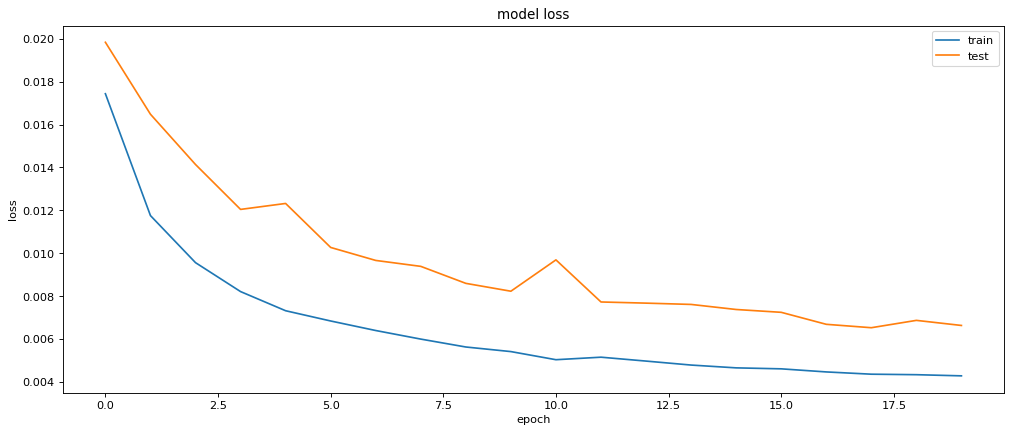

In [ ]:
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# summarize history for loss
plt.figure(figsize = (15,6), dpi = 81)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

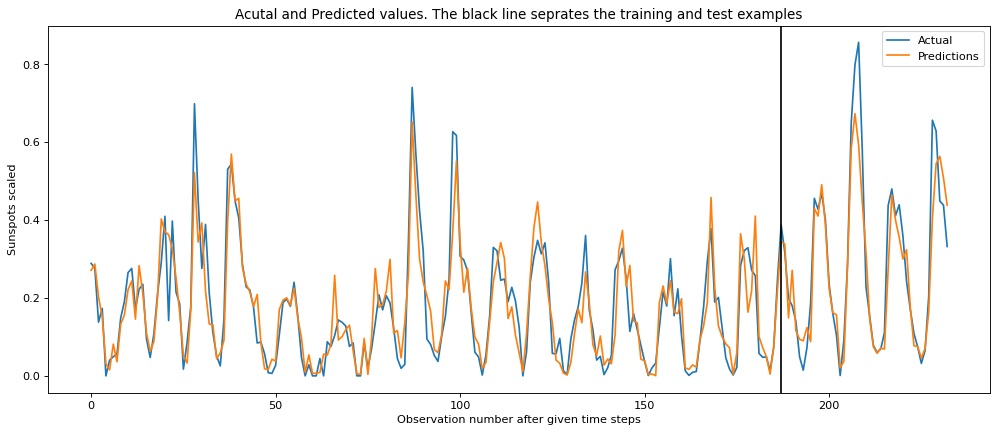

In [ ]:
def plot_result(train_y, test_y, train_predict, test_predict):
  actual = np.append(train_y, test_y)
  prediction = np.append(train_predict, test_predict)
  rows = len(actual)
  plt.figure(figsize = (15,6), dpi = 81)
  plt.plot(range(rows), actual)
  plt.plot(range(rows), prediction)
  plt.axvline(x= len(train_y), color='black')
  plt.legend(['Actual', 'Predictions'])
  plt.xlabel('Observation number after given time steps')
  plt.ylabel ('Sunspots scaled')
  plt.title('Acutal and Predicted values. The black line seprates the training and test examples')
plot_result(train_y, test_y, train_predict, test_predict)

In [ ]:
data.shape

(2820,)

In [ ]:
url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
df= read_csv(url, engine='python')
df.head()

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0
